<a href="https://colab.research.google.com/github/ChloeLucido/Ramp-Pathways/blob/main/Figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read in the line in the file that is pertinent
pilra_speeds = pd.read_csv('pilra_speeds.txt', skiprows=[0,2,3,4,5,6,7],
                           dtype=np.float64, header=None)

In [ ]:
pilra_mutant_speed = pd.read_csv('pilra_mutant_speeds.txt', skiprows=[0],
                                dtype=np.float64, header=None)

In [ ]:
# Calculate sliding window means

speeds = pilra_speeds.values[0]
N = 9 # Use a 9-codon window (the default setting for ExtRamp)
windowMeans = pd.Series(speeds).rolling(window=N).mean().iloc[N-1:].values


In [ ]:
mutant_speeds = pilra_mutant_speed.values[0]
N = 9
mutant_windowMeans = pd.Series(mutant_speeds).rolling(window=N).mean().iloc[N-1:].values

AttributeError: ignored

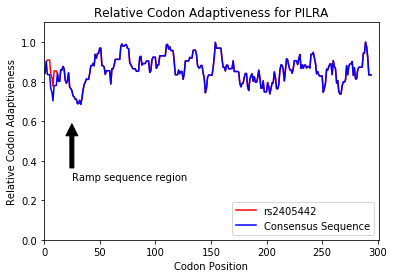

In [ ]:


positions = range(1, 295) # for x-axis

# Plot the data



plt.plot(positions, mutant_windowMeans, 'r', label="rs2405442")
plt.plot(positions, windowMeans, 'b', label="NP_038467.2")
#plt.plot()
plt.xlim([0,301]) # Doesn't run when set to 300...?
plt.ylim([0,1.1])
# Any ideas about more accurate/precise labels/titles for the figure?
# Specifically, how do we reference that these are predicted means?
plt.ylabel('Relative Codon Adaptiveness')
plt.xlabel('Codon Position')
plt.title('Relative Codon Adaptiveness for PILRA')
plt.annotate('Ramp sequence region', xy=(25,.6),
             xytext=(25, .3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc="lower right")



plt.show()

# An idea of what text could accompany/explain a figure like this:
# Figure 2: Predicted rate of translation of PILRA mRNA, produced using ExtRamp.
# The plot depicts mean translation rates produced using a sliding window
# of 9-codons. The ramp sequence, which by definition is located at the
# beginning of the sequence, has been labeled for clarity.

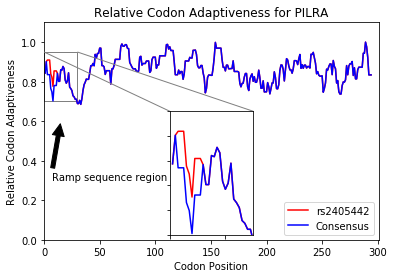

In [ ]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot

ax.plot(positions, mutant_windowMeans, 'r', label="rs2405442")
ax.plot(positions, windowMeans, 'b', label="Consensus")
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=8)
axins.plot(positions, mutant_windowMeans, 'r')
axins.plot(positions, windowMeans, 'b')
ax.set_xlim([0,301]) # Doesn't run when set to 300...?
ax.set_ylim([0,1.1])
x1, x2, y1, y2 = 0, 30, 0.7, 0.95 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
plt.yticks(visible=False)
plt.xticks(visible=False)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

ax.set_ylabel('Relative Codon Adaptiveness')
ax.set_xlabel('Codon Position')
ax.set_title('Relative Codon Adaptiveness for PILRA')
ax.annotate('Ramp sequence region', xy=(15,.6),
             xytext=(7, .3), arrowprops=dict(facecolor='black', shrink=0.05))
ax.legend(loc="lower right")
